## Exploration of Loan Dataset from Prosper

Prosper is a leading financial peer-to-peer lending platform company which connects borrowers and investors. In this Prosper loan data set, it roughly contains four kinds of loan data information - Loan Status, Borrower Data, Loan Information Data and Credit Risk Matrices during 2005 to 2014. 

In [1]:
import pandas as pd
#Seaborn Version 0.11 was manually downloaded and imported due to connectivity issues
import seabornv11 as sb
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# Reading data from source
df=pd.read_csv('prosperLoanData.csv')
df.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. Most variables are numeric and categorical in nature.

#### What are the main feature(s) of interest in your dataset?

We will focus on "BorrorwerAPR" and features responsible for same. We can use these features to predict our main variable.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We will make use of below features.There can be others as well , however for sake of project we are taking few of them which 
I felt related.

['CreditGrade','Term','LoanStatus','EstimatedReturn','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore',
'ListingCategory','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','TotalCreditLinespast7years',
'BankcardUtilization','AvailableBankcardCredit','DebtToIncomeRatio','IncomeRange','TotalProsperLoans','LoanOriginalAmount',
'MonthlyLoanPayment']

## Univariate Exploration

Here we have tried to understand the structure of data and distribution for our important variables.

In [4]:
#Determine Min Max for Custom Bins
df['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

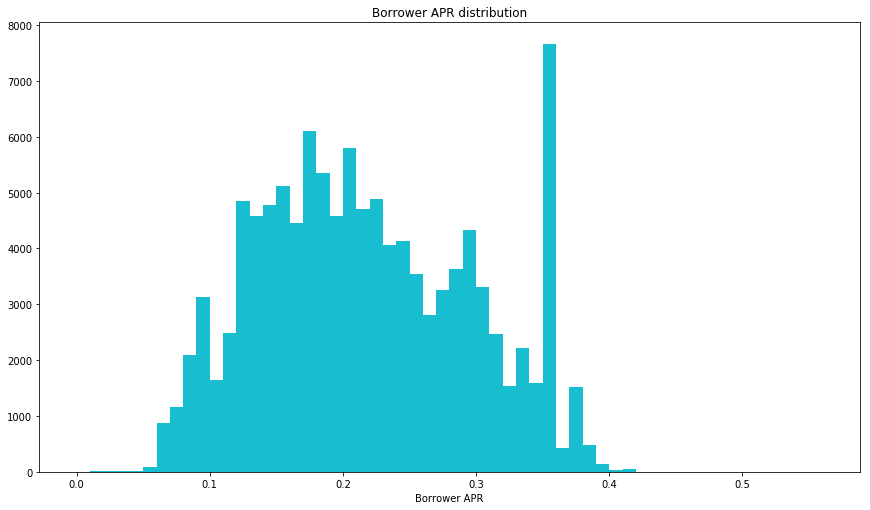

In [5]:
#Histogram for Borrower APR distribution
custombins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df[df['BorrowerAPR']>0], x = 'BorrowerAPR', bins = custombins,color=colors);
plt.xlabel('Borrower APR');
plt.title('Borrower APR distribution');

The distribution of BorrowerAPR looks multimodal. A peak somehwere around 0.35-0.36 is seen.
There seems some outliers which we will check below.


In [6]:
#Borrower APR Outliers below 0.05 or after 0.42 for cleaner distribution
df.loc[(df['BorrowerAPR']<=0.05) | (df['BorrowerAPR']>0.42) ].shape[0]

46

Count of there outliers is very low , hence we can ignore them.

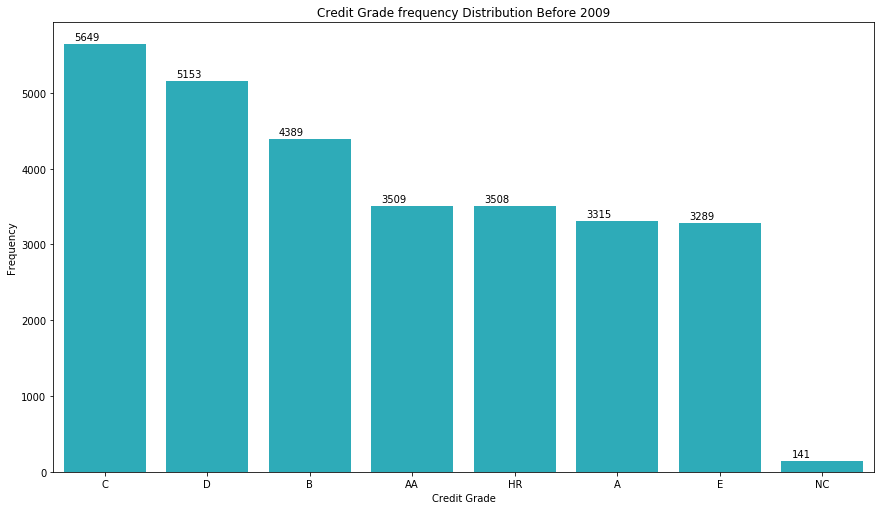

In [7]:
#Credit Grade frequency Distribution Before 2009
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'CreditGrade', color = colors,order=df['CreditGrade'].value_counts().index);
plt.title('Credit Grade frequency Distribution Before 2009');
plt.ylabel('Frequency');
plt.xlabel('Credit Grade');
#plt.xticks(rotation=0);

#Data lables reference
#https://www.codegrepper.com/code-examples/whatever/display+values+on+countplot
    
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Before C,D,B were top three rated customers before 2009

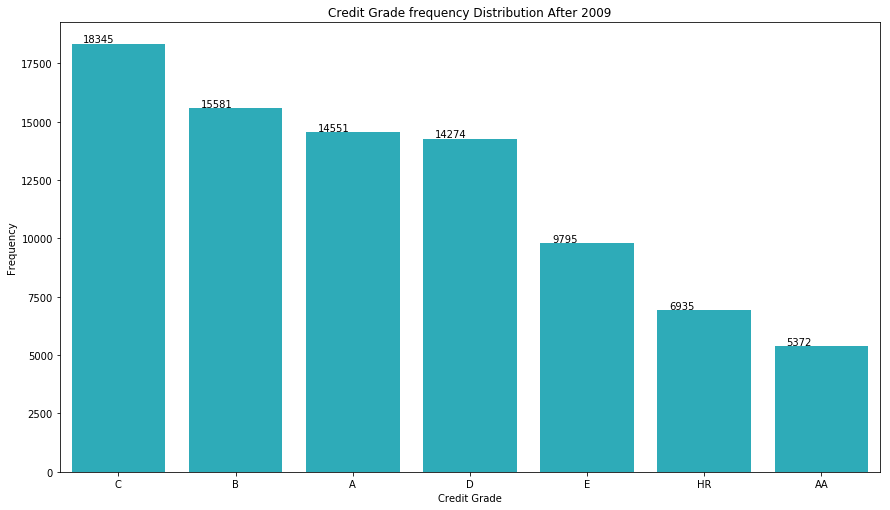

In [8]:
#Credit Grade frequency Distribution After 2009
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = colors,order=df['ProsperRating (Alpha)'].value_counts().index);
plt.title('Credit Grade frequency Distribution After 2009');
plt.ylabel('Frequency');
plt.xlabel('Credit Grade');
#plt.xticks(rotation=0);
    
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

However after 2009 C,B,A were top rated with increased customerbase than earlier.

In [9]:
#Check min-max for EstimatedReturn custombins 
df['EstimatedReturn'].describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

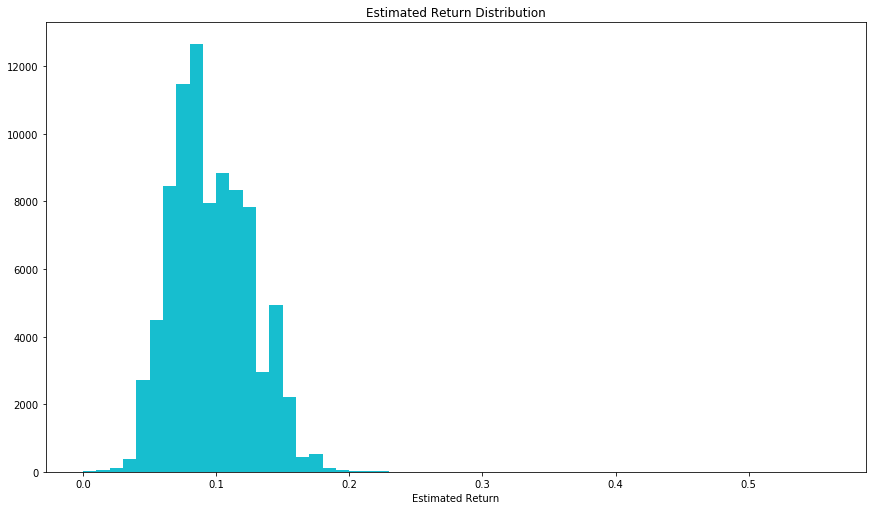

In [10]:
#Histogram for Estimated Return Distribution
custombins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df[df['EstimatedReturn']>0], x = 'EstimatedReturn', bins = custombins,color=colors);
plt.title('Estimated Return Distribution');
plt.xlabel('Estimated Return');

Esitmated returns distribution looks rightly screwed. Records below 0% and 0.2% can be considered as outliers.

In [11]:
#Estimated Return Outliers
df[(df['EstimatedReturn']<0) | (df['EstimatedReturn']>0.2) ].shape[0]

275

Again since the count is minimal we are ignoring above records.

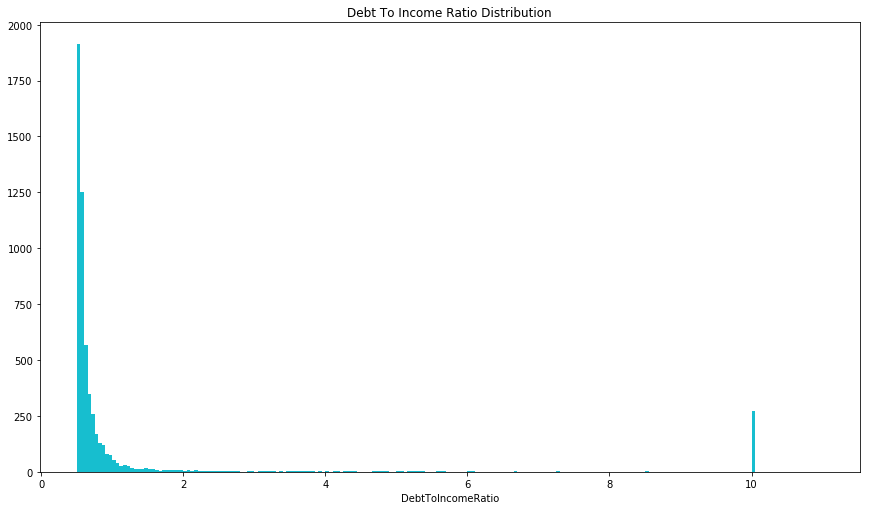

In [12]:
# Histogram for Debt To Income Ratio Distribution
custombins = np.arange(0.5, df.DebtToIncomeRatio.max()+1, 0.05)
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df[df['DebtToIncomeRatio']>0], x = 'DebtToIncomeRatio', bins = custombins,color=colors);
plt.title('Debt To Income Ratio Distribution');
plt.xlabel('DebtToIncomeRatio');

Debt To Income Ratio Distribution is highly right screwed with possible outliers at ratio=10.

In [13]:
#DebtToIncomeRatio Outliers
df.loc[(df['DebtToIncomeRatio']<0) | (df['DebtToIncomeRatio']>2) ].shape[0]

479

Again 479 records are very less as compared to total 113912 , hence not dropping. However to perform any predictive analysis , 
dropping them would be benficial to avoid any kind of bais.

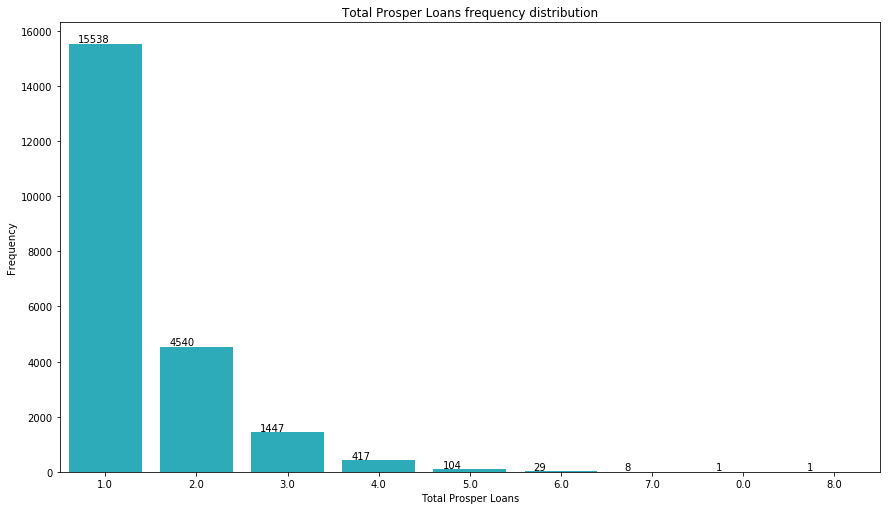

In [14]:
#Total Prosper Loans frequency distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'TotalProsperLoans', color = colors, order=df['TotalProsperLoans'].value_counts().index);
plt.title('Total Prosper Loans frequency distribution');
plt.ylabel('Frequency');
plt.xlabel('Total Prosper Loans');
#plt.xticks(rotation=0);

for p in ax.patches:
        ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Majority of customers have single prosper loans , however a good number have also opted for multiple prosper loans , may be due to their good credit history or strong current financial situation.

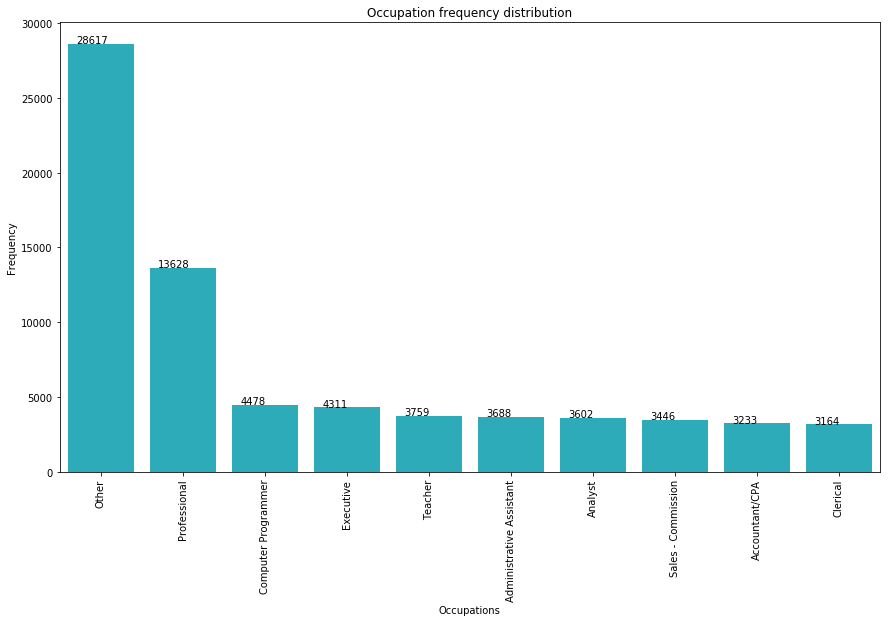

In [15]:
#Top 10 Occupation frequency distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'Occupation', color = colors, order=df['Occupation'].value_counts().head(10).index);
plt.title('Occupation frequency distribution');
plt.ylabel('Frequency');
plt.xlabel('Occupations');
plt.xticks(rotation=90);

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Majority Customer seems to have Other as occupation. Biferation of this other is not available though. Professional, Computer Programmer , Executive seems also on top. Since these are high salaried jobs , company might prefer then to grant loans. 

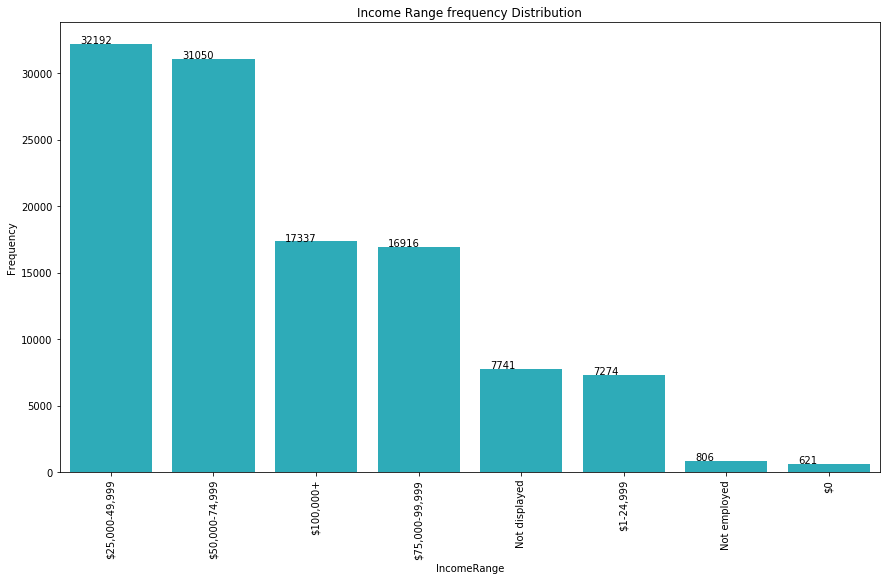

In [16]:
#Income Range frequency Distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'IncomeRange', color = colors,order=df['IncomeRange'].value_counts().index);
plt.title('Income Range frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('IncomeRange');
plt.xticks(rotation=90);

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Customers having good income and getting loan is not a big deal , what is suprising is that small but good number of customers 
with low or zero income have also been given loans. Which can make customer profile risky. We will more analyse it with Borrower APR in bivariate sections.

In [17]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

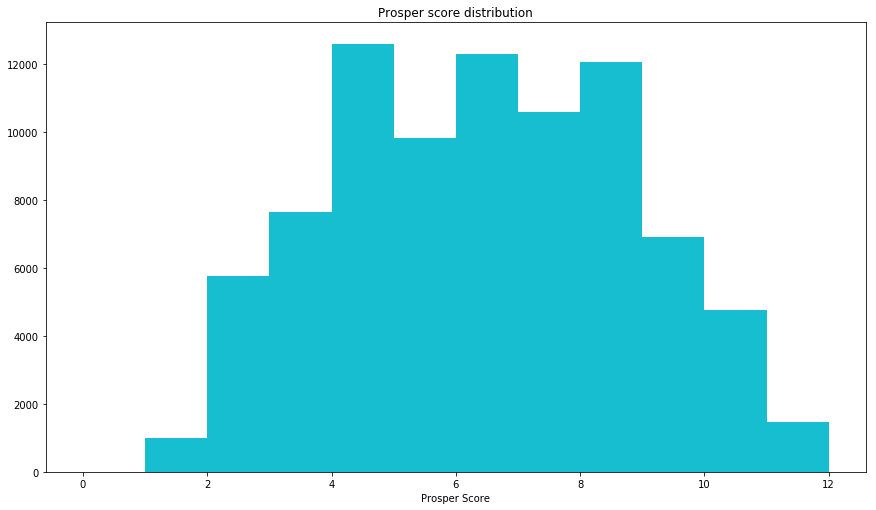

In [18]:
#Prosper score distribution
custombins = np.arange(0,13)
df.ProsperScore.dropna(axis = 0, inplace = True)
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'ProsperScore', bins = custombins,color=colors);
plt.title('Prosper score distribution');
plt.xlabel('Prosper Score');

Prosper score distribution seems normal.

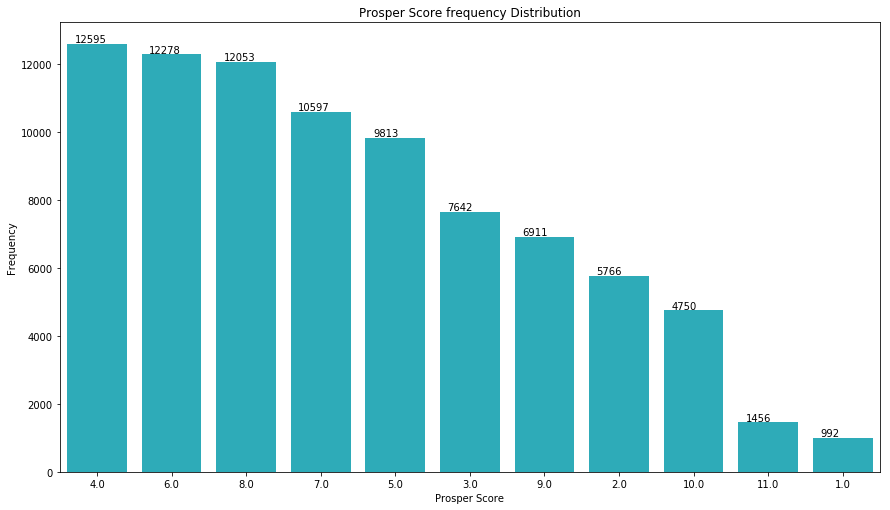

In [19]:
#Prosper Score frequency Distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'ProsperScore', color = colors,order=df['ProsperScore'].value_counts().index);
plt.title('Prosper Score frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Prosper Score');
#plt.xticks(rotation=90);
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Majority of customers have 4,6,8 as prosper score.

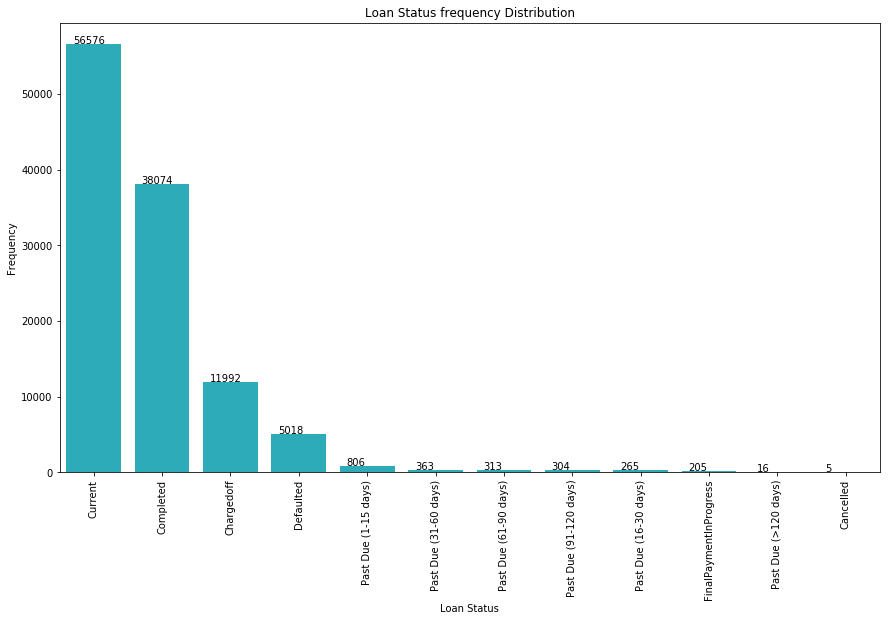

In [20]:
#Loan Status frequency Distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'LoanStatus', color = colors,order=df['LoanStatus'].value_counts().index);
plt.title('Loan Status frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Loan Status');
plt.xticks(rotation=90);
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

(56576/113937)=50% loans are in active state ,(38074/113937)=33% loans are completed , (11992/113937)=10.5% loans have been charged off and approx (5018/113937)=5% have defaulted.

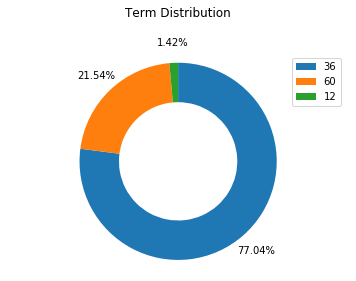

In [21]:
#Term Distribution
sorted_counts = df['Term'].value_counts()
labels=df.Term.unique()
plt.pie(sorted_counts, autopct='%1.2f%%',pctdistance=1.2,startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('equal');
plt.legend(labels=labels)
plt.title('Term Distribution\n\n');

Majority 77.04% loans seems to have 36 months of tenure.We will explore this more with Borrower APR in Multivariate charts section.

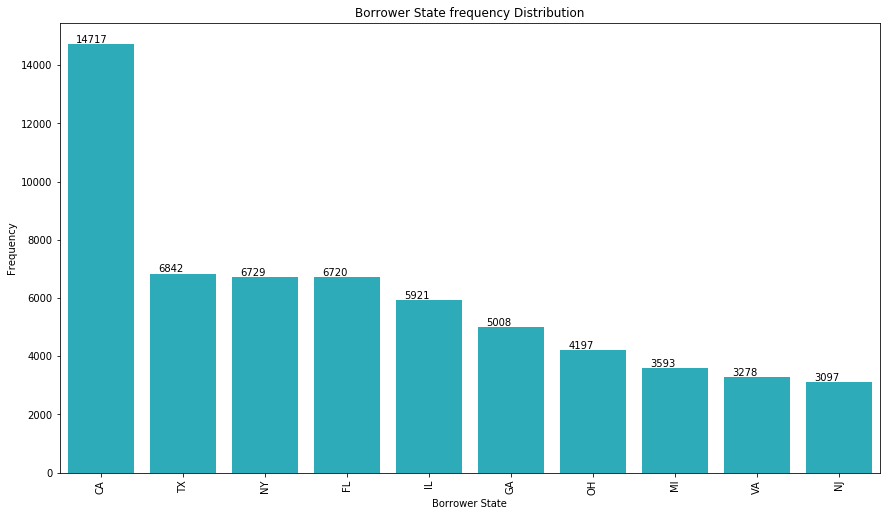

In [22]:
#Top 10 Borrower State frequency Distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'BorrowerState', color = colors,order=df['BorrowerState'].value_counts().head(10).index);
plt.title('Borrower State frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Borrower State');
plt.xticks(rotation=90);
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

CA state has most number of customers , mostly as Prosper HQ is in CA. 

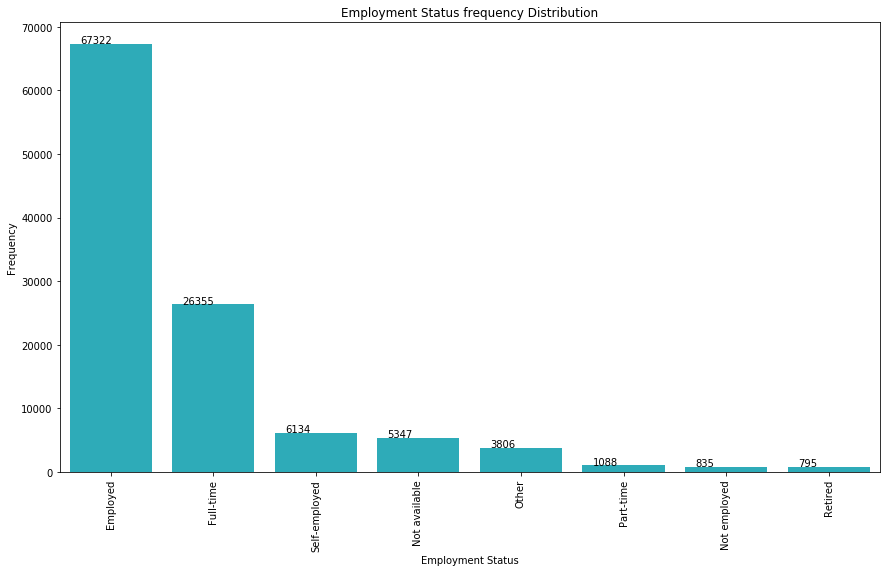

In [23]:
#Employment Status frequency Distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data = df, x = 'EmploymentStatus', color = colors,order=df['EmploymentStatus'].value_counts().index);
plt.title('Employment Status frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Employment Status');
plt.xticks(rotation=90);
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

As we notice above , Employeed customers are the first choice of the loan.

In [24]:
#Creating a column for maintaining year of listing creation
df['CreationDateYear']=pd.to_datetime(df['ListingCreationDate']).dt.to_period('Y')
listing_count=df.groupby(df['CreationDateYear']).size()

C:\ProgramData\Anaconda3\lib\site-packages\seabornv11\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


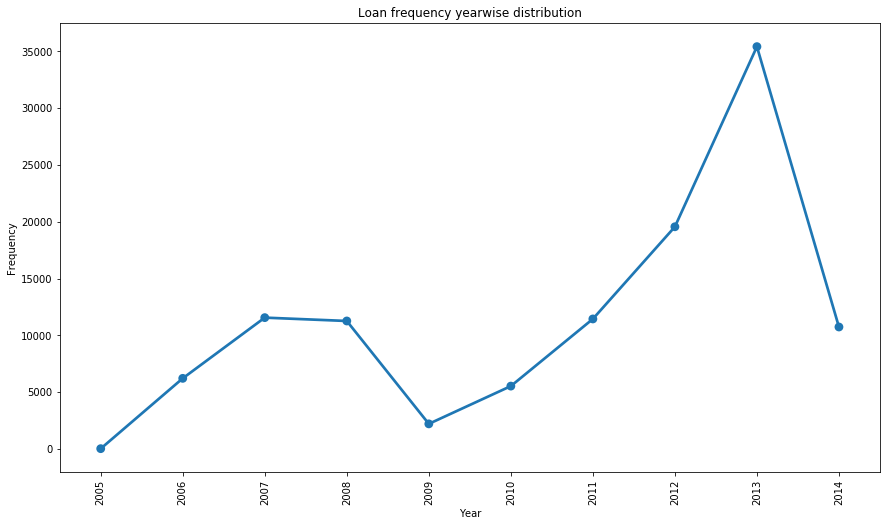

In [25]:
#Loan frequency yearwise Distribution
colors = sb.color_palette()[9]
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(listing_count.index, listing_count.values,colors=colors)
plt.title('Loan frequency yearwise distribution');
plt.ylabel('Frequency');
plt.xlabel('Year');
plt.xticks(rotation=90);

Year 2009 sees a sudden drop , might be due to 2008 financial crisis. Post which a spike is observed in year 2013.

### What can be important variables which could affect borrower APR from above analysis ?

EmploymentStatus, ProsperScore, Term, IncomeRange are few features which can be analysed with Borrower APR and later derive conlusions.

## Bivariate Exploration

In [26]:
#Lists for numeric and categorical variables
num_vars =['Term', 'BorrowerAPR', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio',\
               'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment'
               ]
cat_vars = ['LoanStatus', 'ProsperRating (Alpha)','CreditGrade', 'BorrowerState', 'Occupation',\
            'EmploymentStatus','IncomeRange']

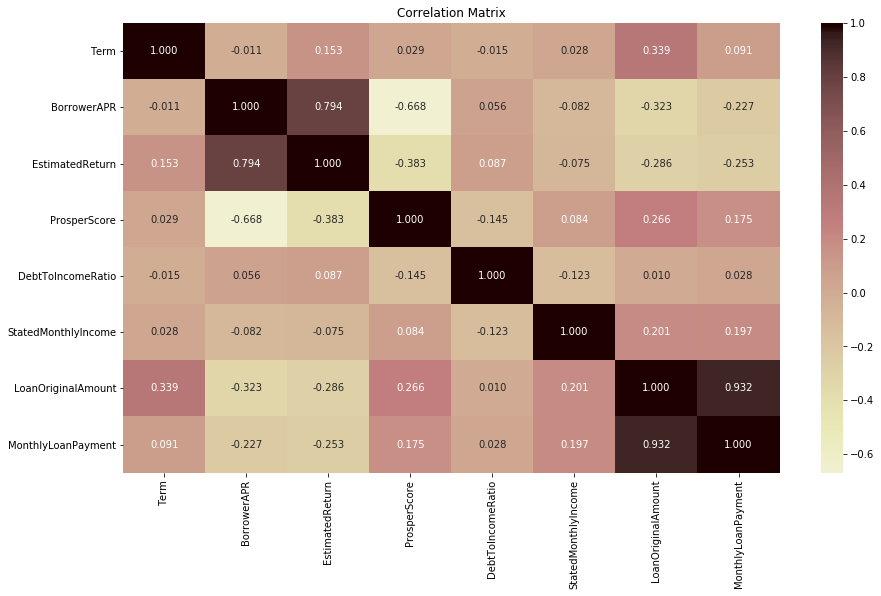

In [27]:
# Correlation matrix for all numeric variables
plt.figure(figsize=[14.70, 8.27])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'pink_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

From above chart we observe below:

    -LoanOriginalAmount and BorrowerAPR have negative relationship, which means bigger the loan amount ,less the BorrowerAPR.
    -Term with Borrower APR also has negative relationship. This can indicate higher the loan term less the Borrower APR.
    -Prosper Score and Borrower APR also show negative relationship.
    -DebtToIncomeRatio and Borrower APR show positive relationship. Higher DebtToIncomeRatio make your profile risky , hence          large Borrower APR can be charged.
    -EstimatedReturn and BorrowerAPR show positive relationship for obvious reasons.

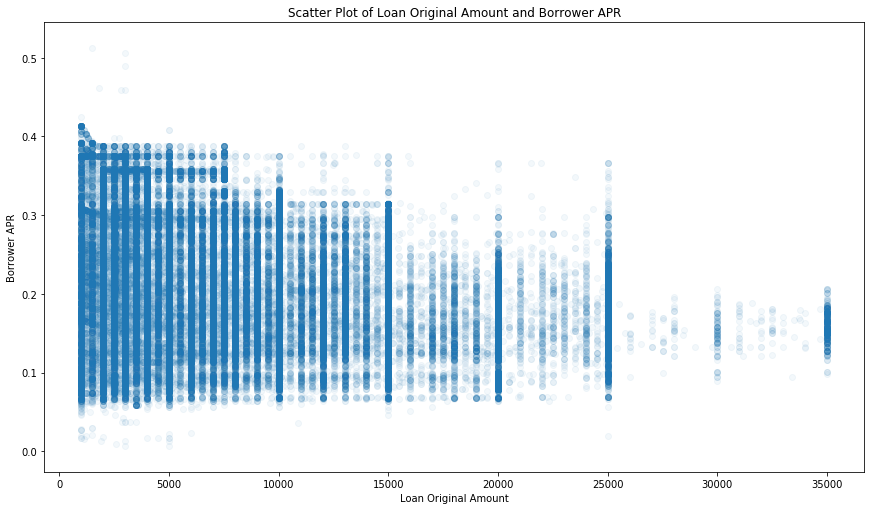

In [28]:
#Scatter Plot of Loan Original Amount and Borrower APR
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR',alpha=0.05)
plt.yticks(np.arange(0, 0.6, 0.1))
plt.title('Scatter Plot of Loan Original Amount and Borrower APR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR');

This chart shows and confirms the negative relations between Loan Amount and borrower APR . More the loan amount less BorrowerAPR is observed.

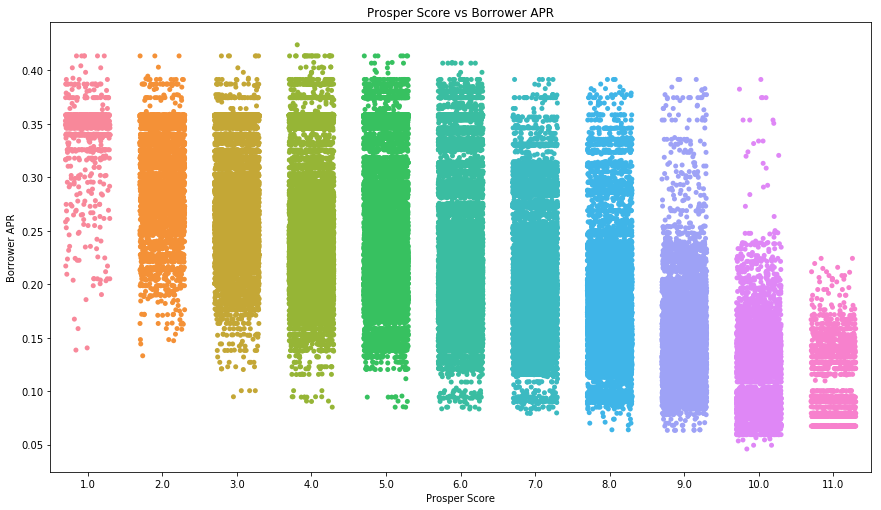

In [29]:
#Prosper Score vs Borrower APR
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR',jitter = .3);
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.title('Prosper Score vs Borrower APR');
#plt.xticks(rotation=90);

Above charts shows for lower prosper score higher borrower APR is seen and vice versa.However even when score is 7 8 good number of customers seem to have higher BorrowerAPR. Prosper score can be an important factor to predict borrower APR. 

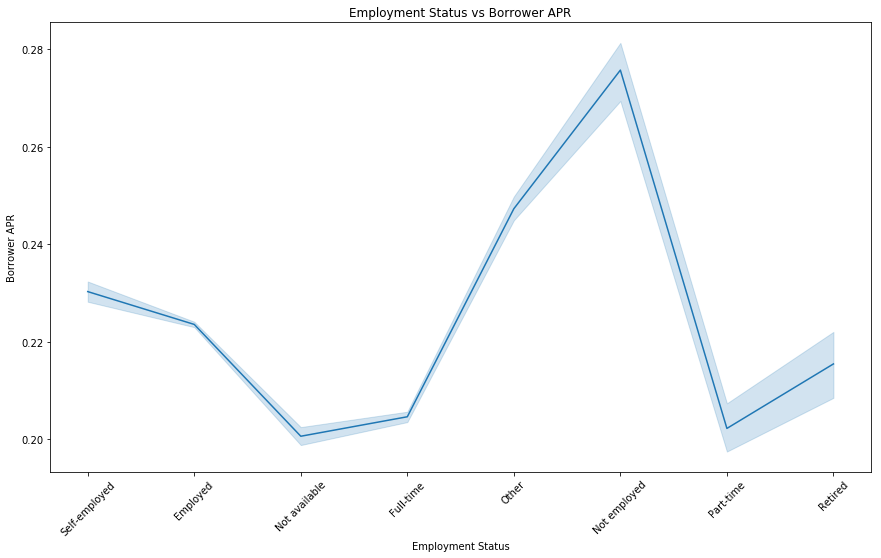

In [30]:
#Employment Status vs Borrower APR
plt.figure(figsize=[14.70, 8.27])
sb.lineplot(data = df[df['EmploymentStatus'].notna()], x = 'EmploymentStatus', y = 'BorrowerAPR');
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR')
plt.title('Employment Status vs Borrower APR');
plt.xticks(rotation=45);

Employed people can get lower BorrowerAPR compared to all other categories.

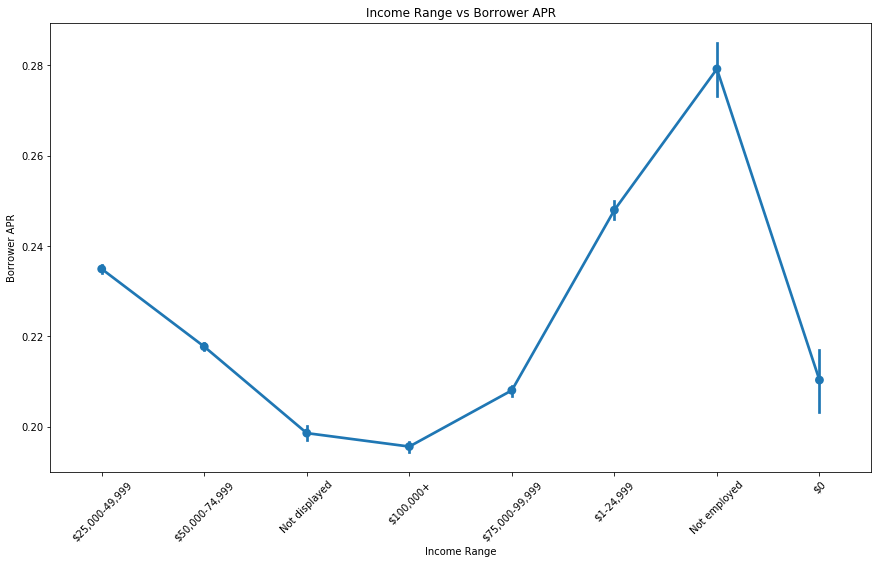

In [31]:
#Income Range vs Borrower APR
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(data = df[df['IncomeRange'].notna()], x = 'IncomeRange', y = 'BorrowerAPR');
plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.title('Income Range vs Borrower APR');
plt.xticks(rotation=45);

As we notice a spike when income range is low indicating greater borrower APR.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From above we can conclude EmploymentStatus, ProsperScore, IncomeRange, LoanOriginalAmount are some important features taken for BorrowerAPR prediction.

## Multivariate Exploration

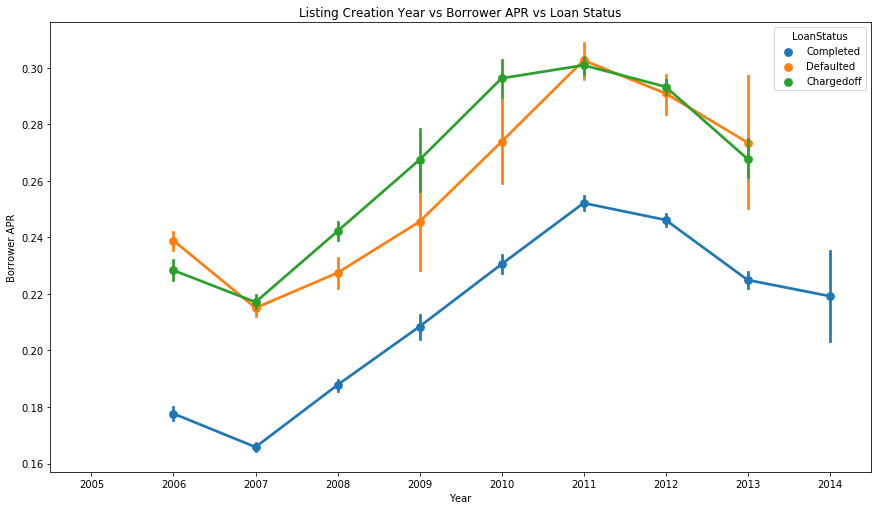

In [32]:
#Listing Creation Year vs Borrower APR vs Loan Status
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(data = df.loc[(df['LoanStatus']=="Completed") | (df['LoanStatus']=="Defaulted") | (df['LoanStatus']=="Chargedoff")  ].sort_values(by='CreationDateYear'), x = 'CreationDateYear', 
            y = 'BorrowerAPR', hue = "LoanStatus");
plt.xlabel('Year')
plt.ylabel('Borrower APR')
plt.title('Listing Creation Year vs Borrower APR vs Loan Status');
#plt.xticks(rotation=90);

Above chart shows that people with higher borrower APR have defaulted more or charged off was needed.Year 2011 marked as highest number of defaults as well as charge offs.

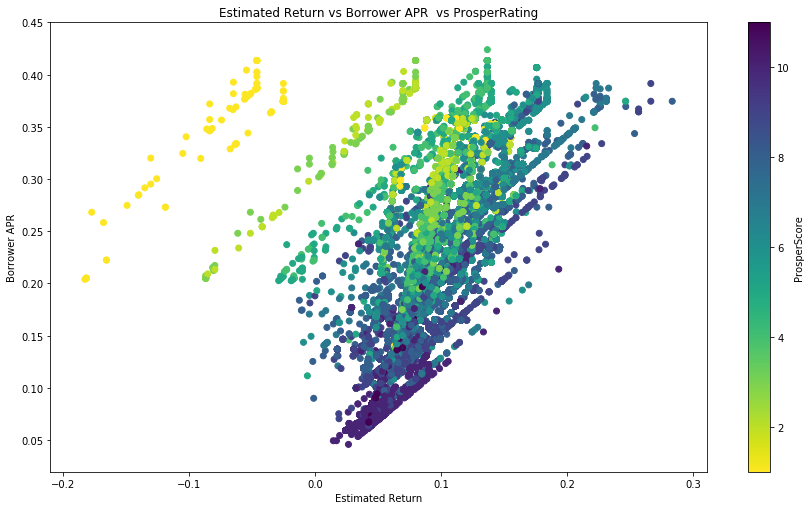

In [33]:
#Estimated Return vs Borrower APR  vs ProsperRating
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data=df,x='EstimatedReturn',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Estimated Return')
plt.ylabel('Borrower APR')
plt.title('Estimated Return vs Borrower APR  vs ProsperRating');

Another variable Estimated Return was analysed here with Borrower APR and Prosper Score. Estimated returns less than 0 with lower prosper score can lead to higher BorrowerAPR. However a seperate analysis is needed to know how Estimated Return is calculated.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Prosper Score proves one of the most important variable for predicting borrower APR.

In [3]:
#!jupyter nbconvert slide_deck_template.ipynb --to slides --template output_toggle.tpl --post serve

!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True slide_deck_template.ipynb

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1504370 bytes to slide_deck_template.slides.html
